In [1]:
! pip install plotly

In [2]:
! pip install bubbly

In [3]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
from plotly import tools
import plotly.figure_factory as ff

from bubbly.bubbly import bubbleplot

import plotly.tools as tls
import squarify

from numpy import array
from matplotlib import cm

# for providing path
import os

In [4]:
data=pd.read_csv(r"C:\Users\Akash\Desktop\kartik\python\who_suicide_statistics.csv")

In [5]:
data = data.sort_values(['year'], ascending = True)

print(data.shape)

(43776, 6)


In [6]:
# let's check the total number of countries' data available for suicidal analysis

print("No. of Countries available for analysis :", data['country'].nunique())

No. of Countries available for analysis : 141


In [7]:
# checking the head of the table

dat = ff.create_table(data.head())
py.iplot(dat)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43776 entries, 6204 to 25858
Data columns (total 6 columns):
country        43776 non-null object
year           43776 non-null int64
sex            43776 non-null object
age            43776 non-null object
suicides_no    41520 non-null float64
population     38316 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.3+ MB


In [9]:
data.describe()

year   suicides_no    population
count  43776.000000  41520.000000  3.831600e+04
mean    1998.502467    193.315390  1.664091e+06
std       10.338711    800.589926  3.647231e+06
min     1979.000000      0.000000  2.590000e+02
25%     1990.000000      1.000000  8.511275e+04
50%     1999.000000     14.000000  3.806550e+05
75%     2007.000000     91.000000  1.305698e+06
max     2016.000000  22338.000000  4.380521e+07

In [10]:
# let's describe the data

dat = ff.create_table(data.describe(),index=True)
py.iplot(dat)

In [11]:
# renaming the columns

data.rename({'sex' : 'gender', 'suicides_no' : 'suicides'}, inplace = True, axis = 1)

data.columns

Index(['country', 'year', 'gender', 'age', 'suicides', 'population'], dtype='object')

In [12]:
# checkinng the null values in the dataset

data.isnull().sum()

country          0
year             0
gender           0
age              0
suicides      2256
population    5460
dtype: int64

In [13]:
# filling missing values

data['suicides'].fillna(0, inplace = True)
# data['population'].mean()
data['population'].fillna(1664090, inplace = True)

# checking if there is any null value left
data.isnull().sum().sum()

# converting these attributes into integer format
data['suicides'] = data['suicides'].astype(int)
data['population'] = data['population'].astype(int)

In [14]:
data.head()

country  year  gender          age  suicides  population
6204        Brazil  1979  female  15-24 years       385    12448100
26470  Netherlands  1979    male  55-74 years       217     1040500
26471  Netherlands  1979    male    75+ years        93      235800
2615       Austria  1979    male    75+ years         0      141900
2614       Austria  1979    male  55-74 years         0      573800

In [15]:
import warnings
warnings.filterwarnings('ignore')

figure = bubbleplot(dataset = data, x_column = 'suicides', y_column ='population', 
    bubble_column = 'country',  color_column = 'country', 
    x_title = "Number of Suicides", y_title = "Population", title = 'Population vs Suicides',
    x_logscale = False, scale_bubble = 3, height = 650)

py.iplot(figure, config={'scrollzoom': True})

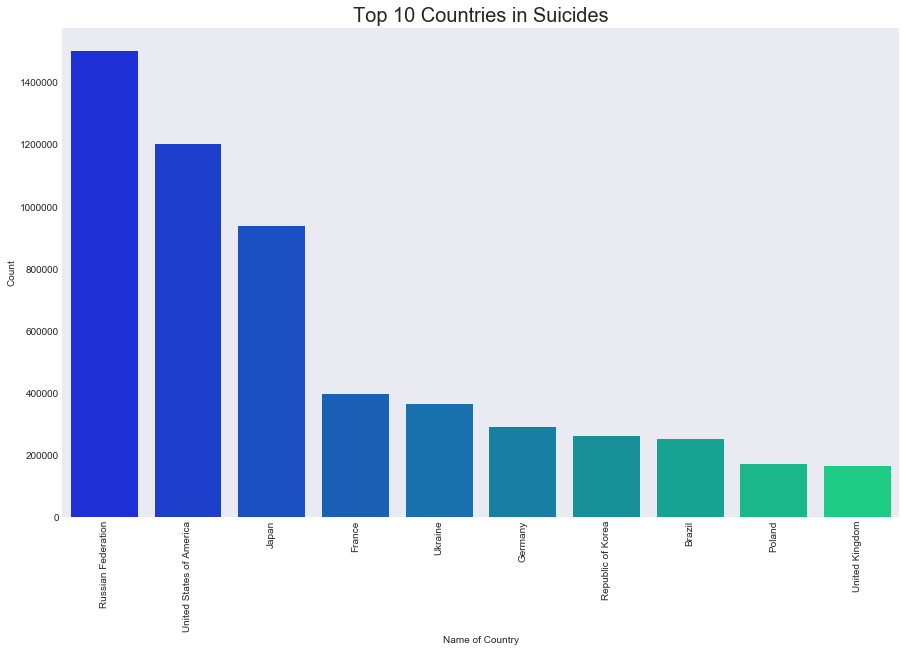

In [16]:
# visualising the different countries distribution in the dataset

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (15, 9)

color = plt.cm.winter(np.linspace(0, 10, 100))
x = pd.DataFrame(data.groupby(['country'])['suicides'].sum().reset_index())
x.sort_values(by = ['suicides'], ascending = False, inplace = True)

sns.barplot(x['country'].head(10), y = x['suicides'].head(10), data = x, palette = 'winter')
plt.title('Top 10 Countries in Suicides', fontsize = 20)
plt.xlabel('Name of Country')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.show()

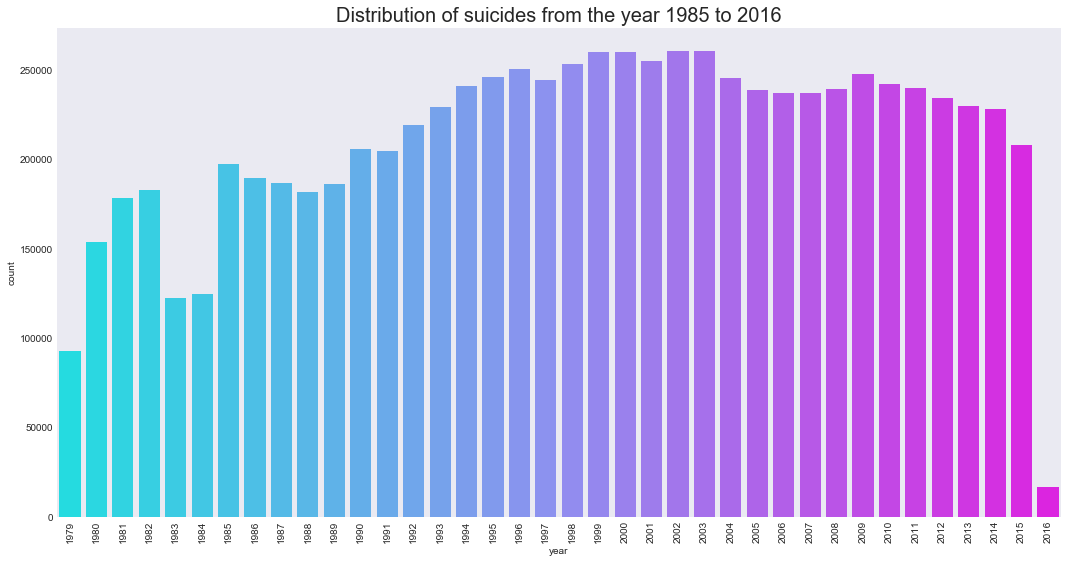

In [17]:
# visualising the different year distribution in the dataset

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (18, 9)

x = pd.DataFrame(data.groupby(['year'])['suicides'].sum().reset_index())
x.sort_values(by = ['suicides'], ascending = False, inplace = True)

sns.barplot(x['year'], y = x['suicides'], data = x, palette = 'cool')
plt.title('Distribution of suicides from the year 1985 to 2016', fontsize = 20)
plt.xlabel('year')
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.show()

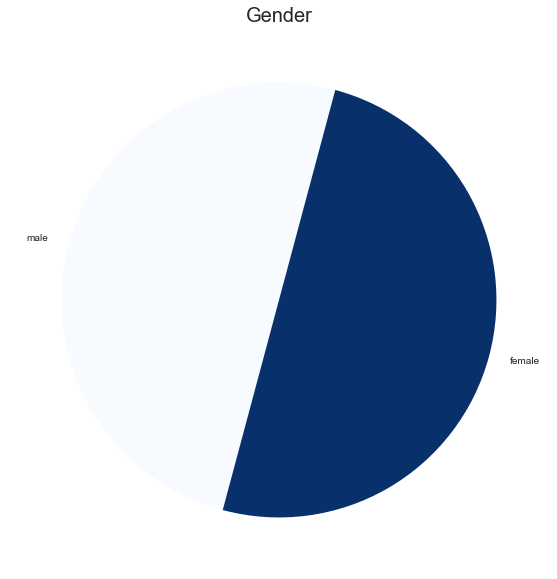

In [18]:
color = plt.cm.Blues(np.linspace(0, 1, 2))
data['gender'].value_counts().plot.pie(colors = color, figsize = (10, 10), startangle = 75)

plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.show()

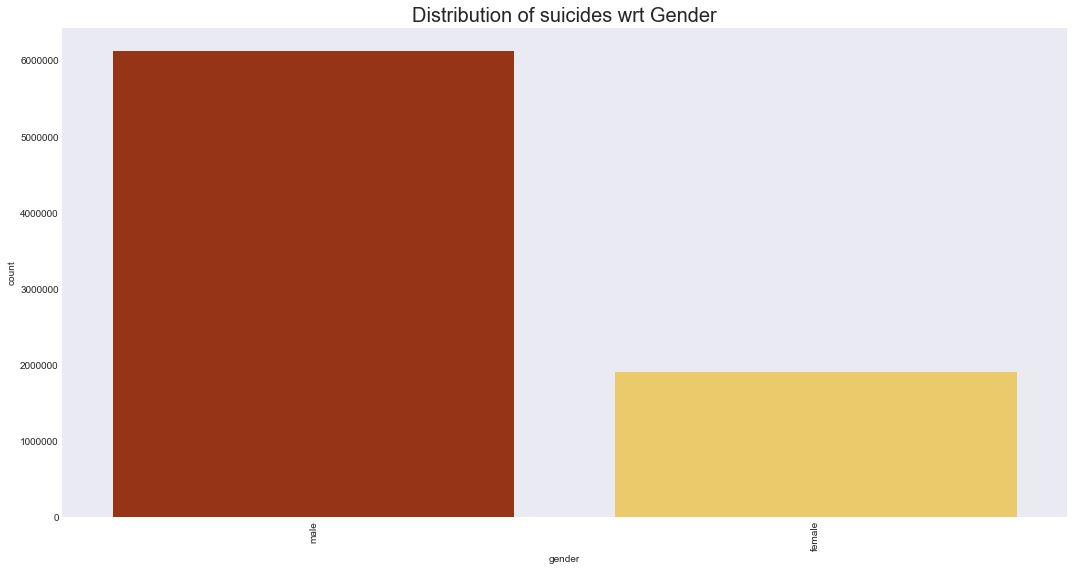

In [19]:
# visualising the different year distribution in the dataset

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (18, 9)

x = pd.DataFrame(data.groupby(['gender'])['suicides'].sum().reset_index())
x.sort_values(by = ['suicides'], ascending = False, inplace = True)

sns.barplot(x['gender'], y = x['suicides'], data = x, palette = 'afmhot')
plt.title('Distribution of suicides wrt Gender', fontsize = 20)
plt.xlabel('gender')
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.show()

In [20]:
suicide = pd.DataFrame(data.groupby(['country','year'])['suicides'].sum().reset_index())

count_max_sui=pd.DataFrame(suicide.groupby('country')['suicides'].sum().reset_index())

count = [ dict(
        type = 'choropleth',
        locations = count_max_sui['country'],
        locationmode='country names',
        z = count_max_sui['suicides'],
        text = count_max_sui['country'],
        colorscale = 'Cividis',
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
)]
layout = dict(
    title = 'Suicides happening across the Globe',
    geo = dict(
        showframe = True,
        showcoastlines = True,
        projection = dict(
            type = 'orthographic'
        )
    )
)
fig = dict( data=count, layout=layout )
iplot(fig, validate=False, filename='d3-world-map')

In [21]:
# looking at the Suicides in USA.

data[data['country'] == 'United States of America'].sample(20)

country  year  gender          age  suicides  \
42072  United States of America  1992  female  15-24 years       649   
41972  United States of America  1983    male  35-54 years      5759   
42343  United States of America  2014    male  25-34 years      5222   
42234  United States of America  2005    male  15-24 years      3498   
42176  United States of America  2000    male  35-54 years      9263   
42098  United States of America  1994  female  35-54 years      2472   
42179  United States of America  2000    male    75+ years      2589   
42152  United States of America  1998    male  35-54 years      9192   
42168  United States of America  2000  female  15-24 years       570   
41920  United States of America  1979  female  55-74 years      1705   
42302  United States of America  2011  female  35-54 years      3776   
42034  United States of America  1988    male  55-74 years      5198   
42223  United States of America  2004    male  25-34 years      4142   
42162  United States of America  1999    male  15-24 years      3326   
42224  United States of America  2004    male  35-54 years     10145   
41971  United States of America  1983    male  25-34 years      5017   
42229  United States of America  2005  female  25-34 years       924   
42351  United States of America  2015  female   5-14 years       158   
42311  United States of America  2011    male    75+ years      2721   
42182  United States of America  2001  female  35-54 years      2893   

       population  
42072    17668700  
41972    24876000  
42343    21760455  
42234    21647159  
42176    40945028  
42098    36290200  
42179     6106351  
42152    39000700  
42168    19105073  
41920    20097000  
42302    42485156  
42034    18235000  
42223    20336031  
42162    19334049  
42224    42486552  
41971    19739000  
42229    19721652  
42351    20342901  
42311     7448796  
42182    42567863

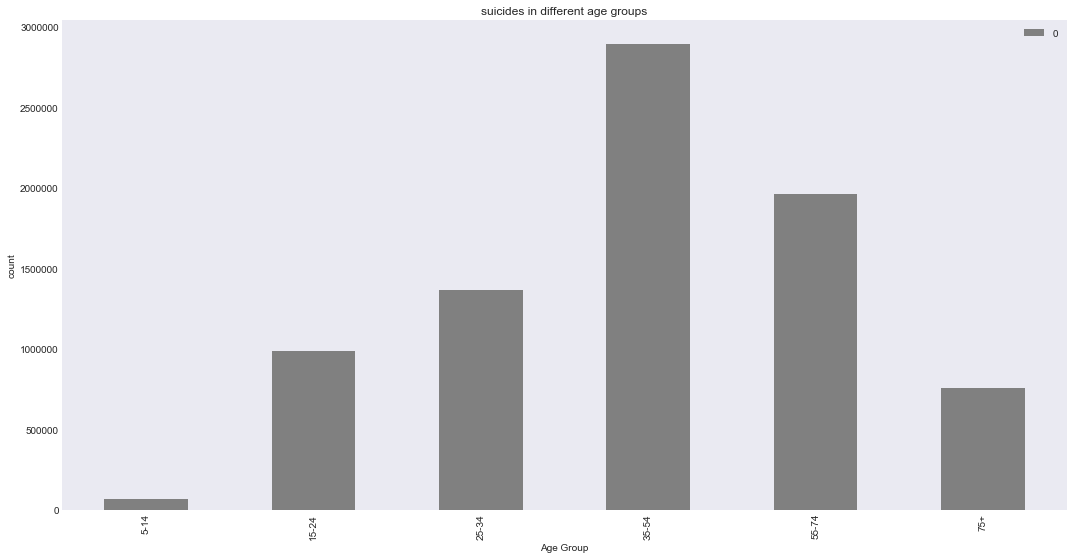

In [22]:
# replacing categorical values in the age column

data['age'] = data['age'].replace('5-14 years', 0)
data['age'] = data['age'].replace('15-24 years', 1)
data['age'] = data['age'].replace('25-34 years', 2)
data['age'] = data['age'].replace('35-54 years', 3)
data['age'] = data['age'].replace('55-74 years', 4)
data['age'] = data['age'].replace('75+ years', 5)

#data['age'].value_counts()

# suicides in different age groups

x1 = data[data['age'] == 0]['suicides'].sum()
x2 = data[data['age'] == 1]['suicides'].sum()
x3 = data[data['age'] == 2]['suicides'].sum()
x4 = data[data['age'] == 3]['suicides'].sum()
x5 = data[data['age'] == 4]['suicides'].sum()
x6 = data[data['age'] == 5]['suicides'].sum()

x = pd.DataFrame([x1, x2, x3, x4, x5, x6])
x.index = ['5-14', '15-24', '25-34', '35-54', '55-74', '75+']
x.plot(kind = 'bar', color = 'grey')

plt.title('suicides in different age groups')
plt.xlabel('Age Group')
plt.ylabel('count')
plt.show()

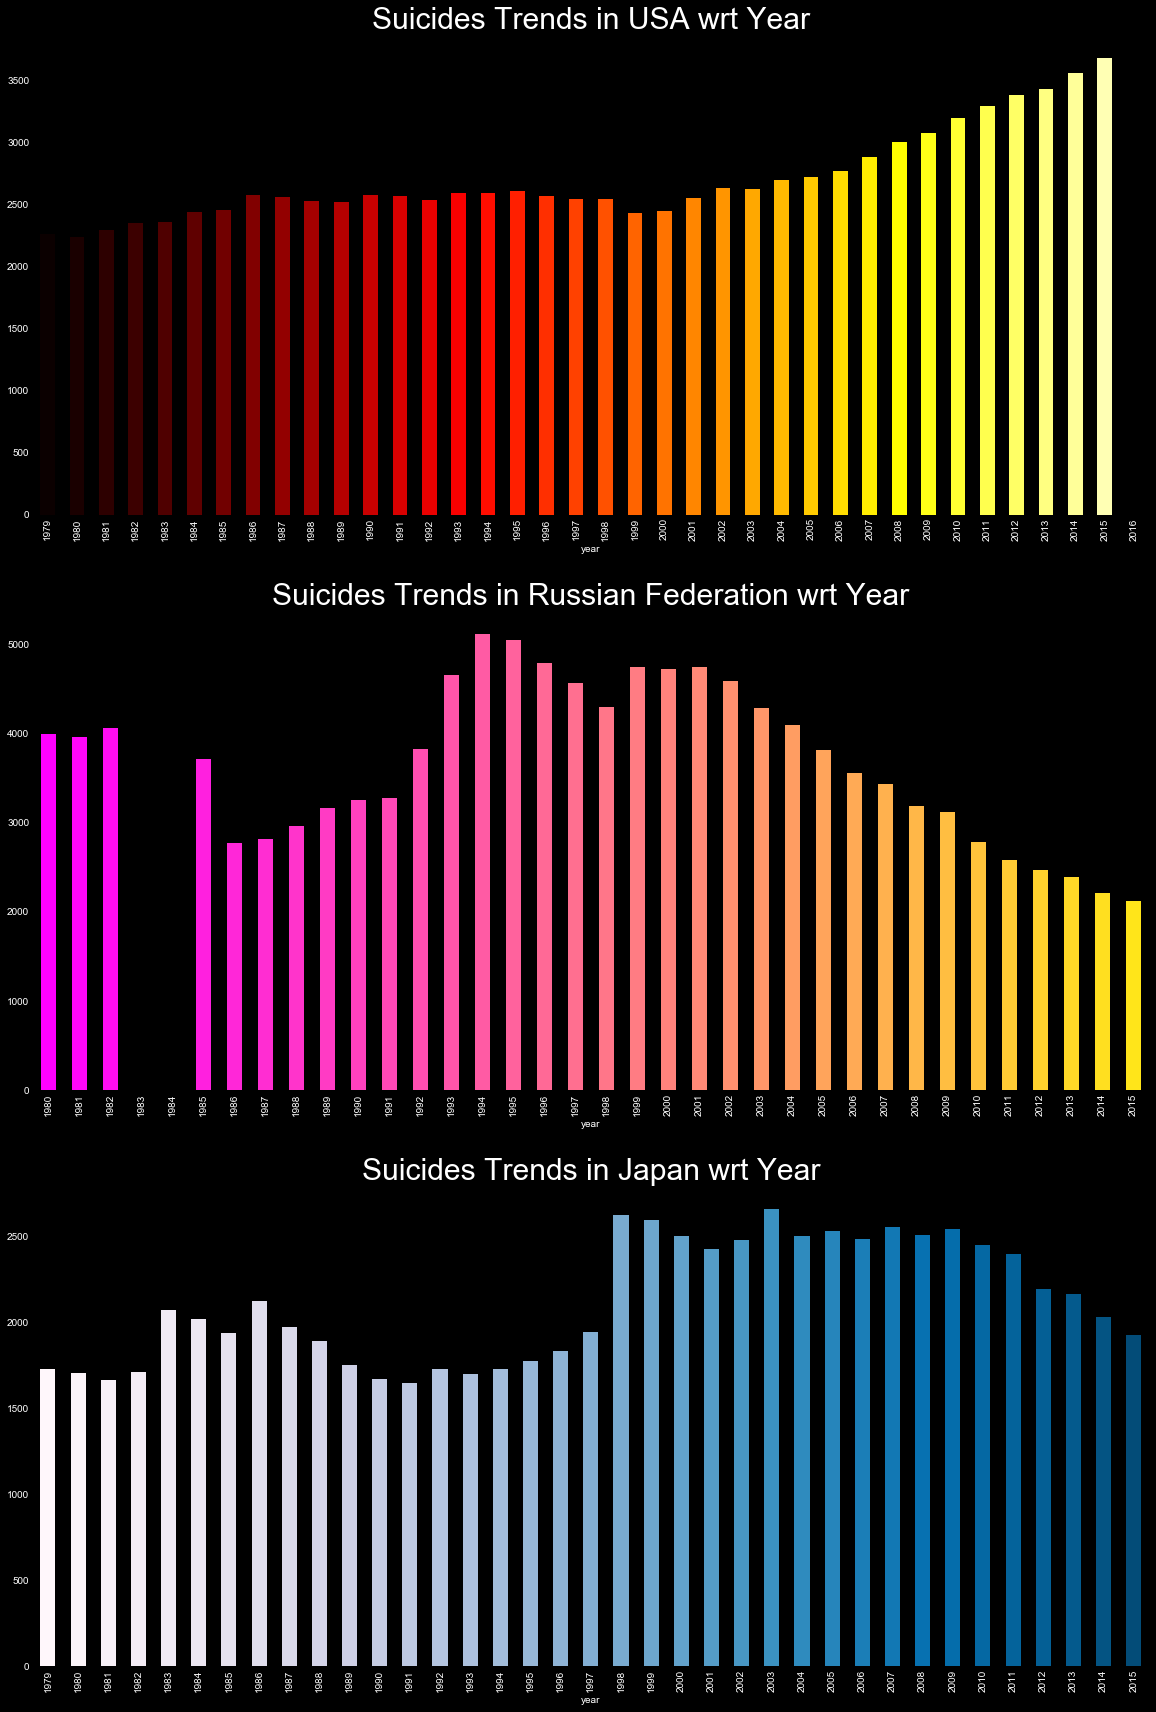

In [23]:
df = data.groupby(['country', 'year'])['suicides'].mean()
df = pd.DataFrame(df)

# looking at the suicides trends for any 3 countries
plt.rcParams['figure.figsize'] = (20, 30)
plt.style.use('dark_background')

plt.subplot(3, 1, 1)
color = plt.cm.hot(np.linspace(0, 1, 40))
df['suicides']['United States of America'].plot.bar(color = color)
plt.title('Suicides Trends in USA wrt Year', fontsize = 30)

plt.subplot(3, 1, 2)
color = plt.cm.spring(np.linspace(0, 1, 40))
df['suicides']['Russian Federation'].plot.bar(color = color)
plt.title('Suicides Trends in Russian Federation wrt Year', fontsize = 30)

plt.subplot(3, 1, 3)
color = plt.cm.PuBu(np.linspace(0, 1, 40))
df['suicides']['Japan'].plot.bar(color = color)
plt.title('Suicides Trends in Japan wrt Year', fontsize = 30)

plt.show()

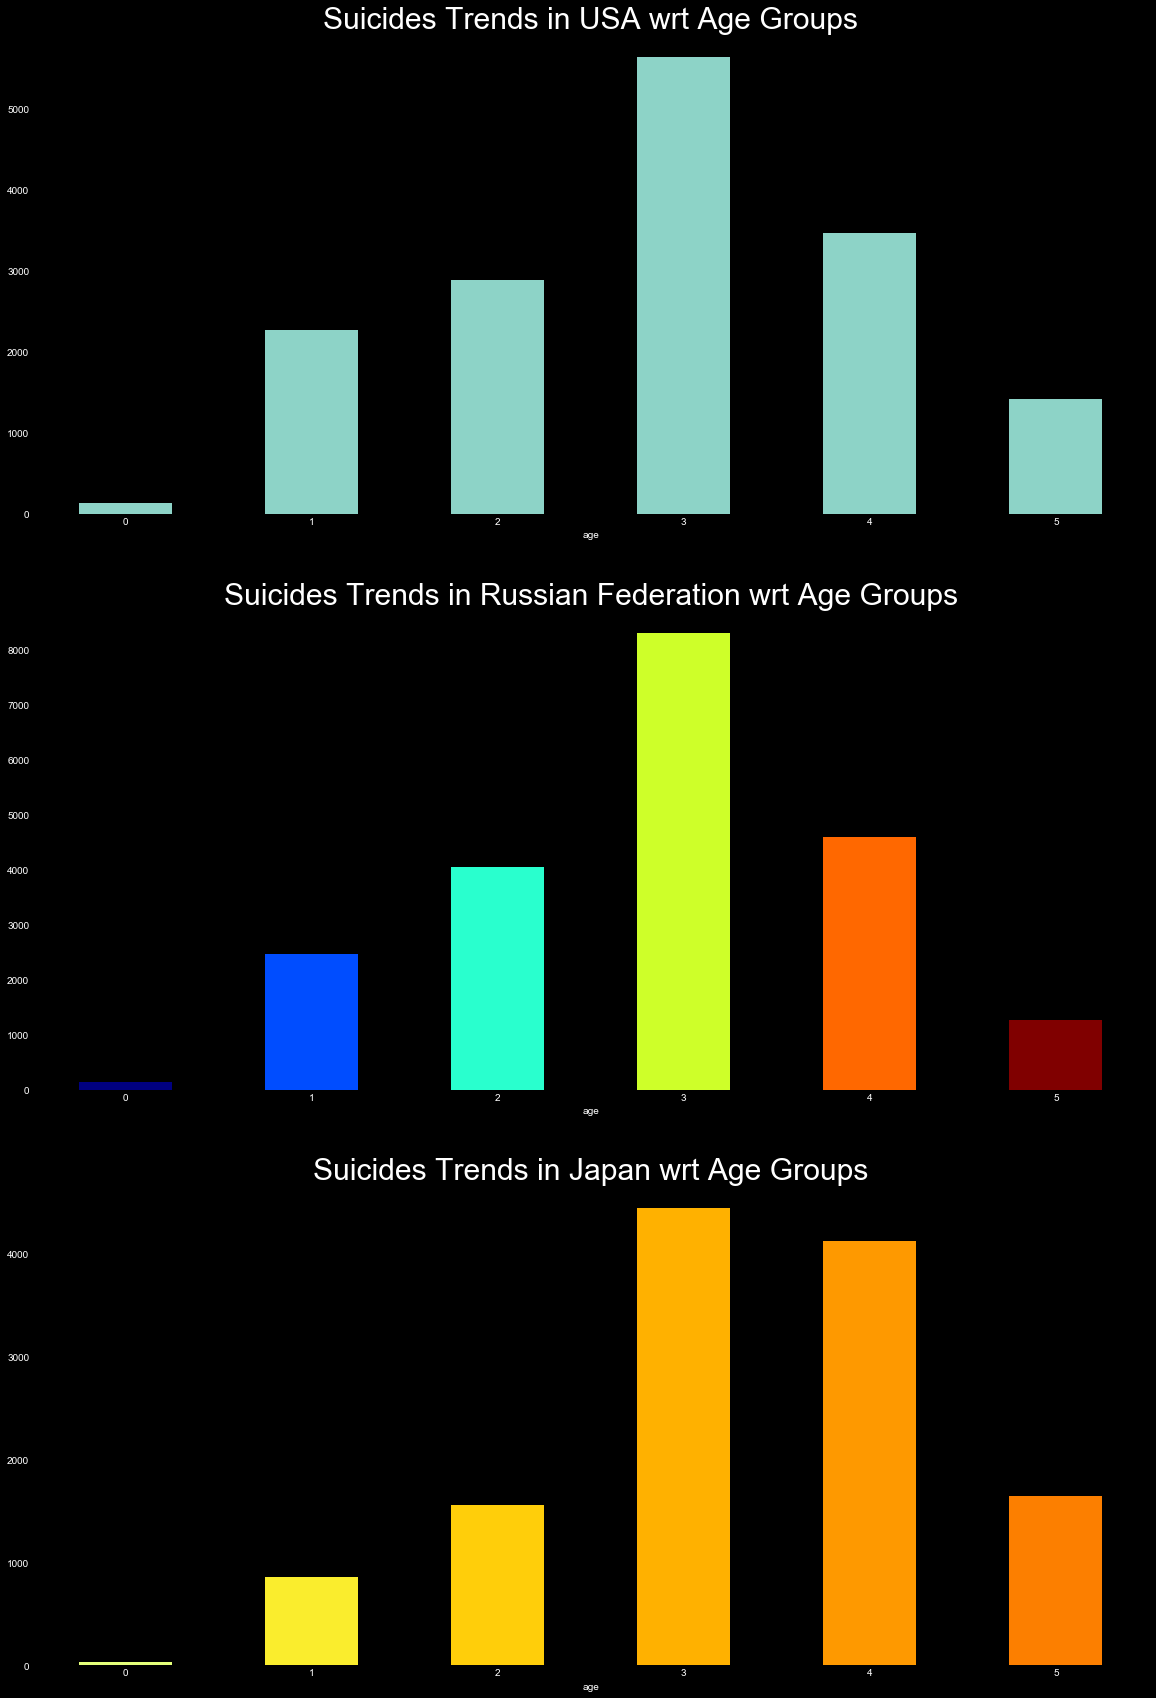

In [24]:
df2 = data.groupby(['country', 'age'])['suicides'].mean()
df2 = pd.DataFrame(df2)

# looking at the suicides trends for any 3 countries
plt.rcParams['figure.figsize'] = (20, 30)

plt.subplot(3, 1, 1)
df2['suicides']['United States of America'].plot.bar()
plt.title('Suicides Trends in USA wrt Age Groups', fontsize = 30)
plt.xticks(rotation = 0)

plt.subplot(3, 1, 2)
color = plt.cm.jet(np.linspace(0, 1, 6))
df2['suicides']['Russian Federation'].plot.bar(color = color)
plt.title('Suicides Trends in Russian Federation wrt Age Groups', fontsize = 30)
plt.xticks(rotation = 0)

plt.subplot(3, 1, 3)
color = plt.cm.Wistia(np.linspace(0, 1, 6))
df2['suicides']['Japan'].plot.bar(color = color)
plt.title('Suicides Trends in Japan wrt Age Groups', fontsize = 30)
plt.xticks(rotation = 0)

plt.show()

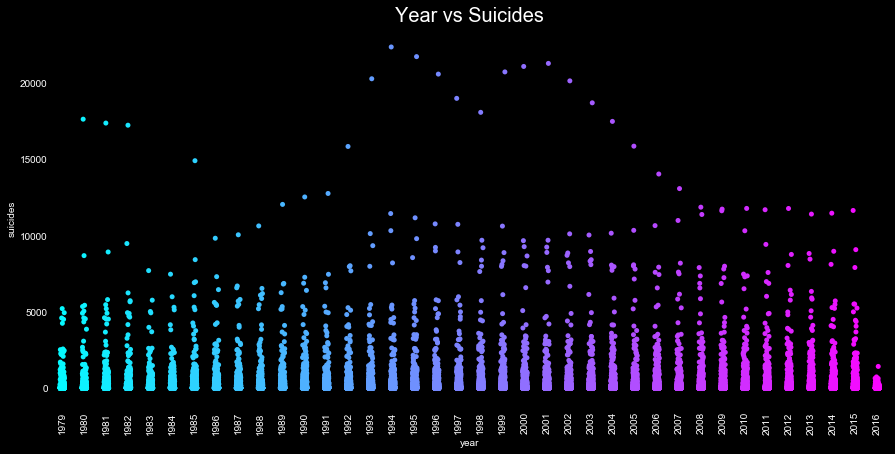

In [25]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('dark_background')

sns.stripplot(data['year'], data['suicides'], palette = 'cool')
plt.title('Year vs Suicides', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

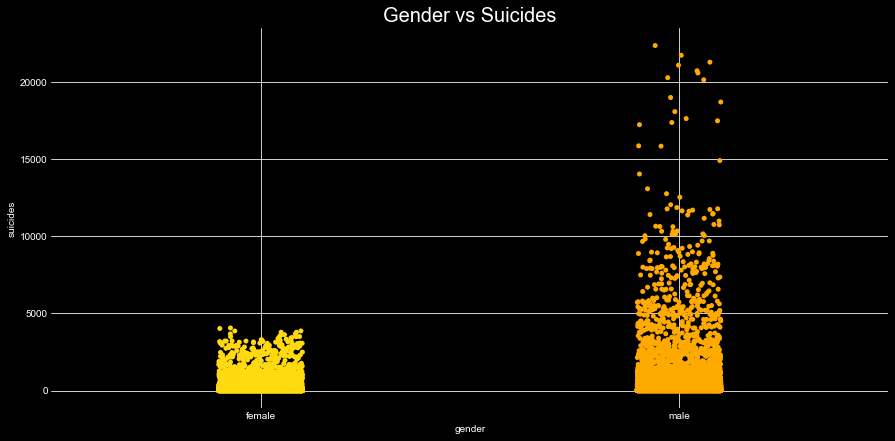

In [26]:
# age-group vs suicides

plt.rcParams['figure.figsize'] = (15, 7)


sns.stripplot(data['gender'], data['suicides'], palette = 'Wistia')
plt.title('Gender vs Suicides', fontsize = 20)
plt.grid()
plt.show()

In [27]:
# label encoding for gender

from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])

data['gender'].value_counts()

1    21888
0    21888
Name: gender, dtype: int64

In [28]:
# deleting unnecassary column

data = data.drop(['country'], axis = 1)

data.columns

Index(['year', 'gender', 'age', 'suicides', 'population'], dtype='object')

In [29]:
#splitting the data into dependent and independent variables

x = data.drop(['suicides'], axis = 1)
y = data['suicides']

print(x.shape)
print(y.shape)

(43776, 4)
(43776,)


In [30]:
# splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(32832, 4)
(32832,)
(10944, 4)
(10944,)


In [31]:
# min max scaling

import warnings
warnings.filterwarnings('ignore')

# importing the min max scaler
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# scaling the independent variables
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# creating the model
model = LinearRegression()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

MSE : 361228.59026470134
RMSE : 601.0229531928887
r2_score : 0.38373025932176463


In [33]:
from sklearn.ensemble import RandomForestRegressor

# creating the model
model = RandomForestRegressor()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

MSE : 108111.66536882857
RMSE : 328.80338405927114
r2_score : 0.8155573789651637


In [34]:
from sklearn.tree import DecisionTreeRegressor

# creating the model
model = DecisionTreeRegressor()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

MSE : 147939.69686169302
RMSE : 384.6292979762371
r2_score : 0.7476092394730876


In [35]:
from sklearn.ensemble import AdaBoostRegressor

# creating the model
model = AdaBoostRegressor()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

MSE : 249099.7583523985
RMSE : 499.0989464549074
r2_score : 0.5750263195657997


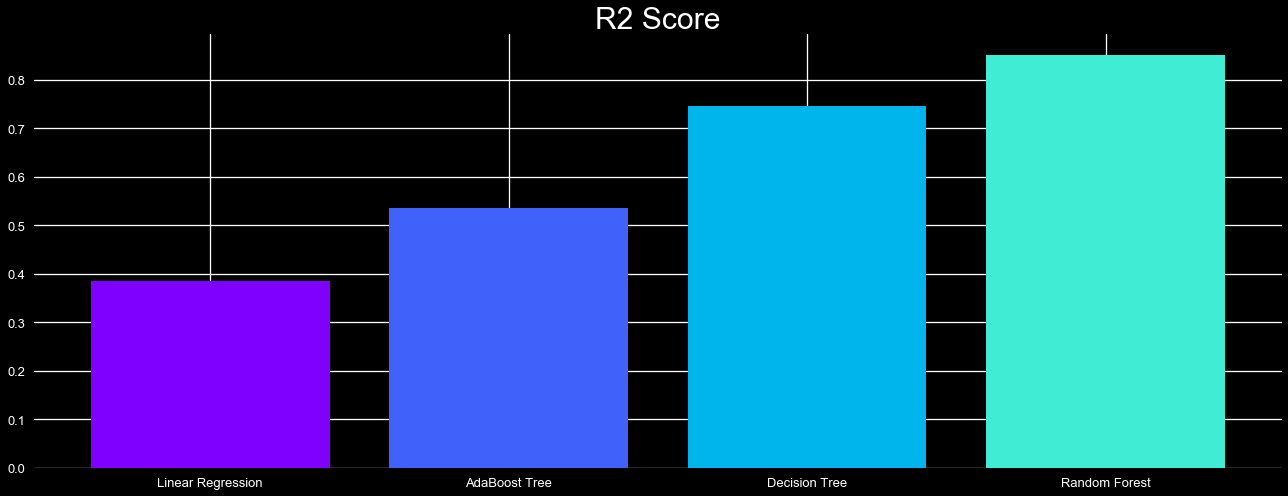

In [36]:
r2_score = np.array([0.385, 0.851, 0.745, 0.535])
labels = np.array(['Linear Regression', 'Random Forest', 'Decision Tree', 'AdaBoost Tree'])
indices = np.argsort(r2_score)
color = plt.cm.rainbow(np.linspace(0, 1, 9))

plt.style.use('seaborn-talk')
plt.rcParams['figure.figsize'] = (18, 7)
plt.bar(range(len(indices)), r2_score[indices], color = color)
plt.xticks(range(len(indices)), labels[indices])
plt.title('R2 Score', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()

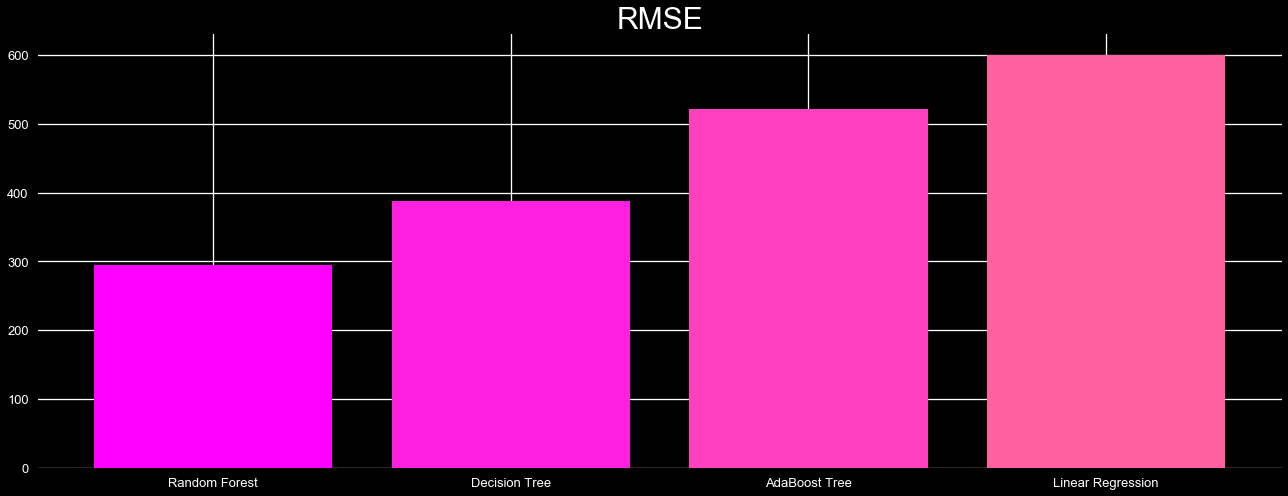

In [37]:
rmse = np.array([600, 295, 388, 521])
labels = np.array(['Linear Regression', 'Random Forest', 'Decision Tree', 'AdaBoost Tree'])
indices = np.argsort(rmse)
color = plt.cm.spring(np.linspace(0, 1, 9))

plt.style.use('seaborn-talk')
plt.rcParams['figure.figsize'] = (18, 7)

plt.bar(range(len(indices)), rmse[indices], color = color)
plt.xticks(range(len(indices)), labels[indices])
plt.title('RMSE', fontsize = 30)

plt.grid()
plt.tight_layout()
plt.show()